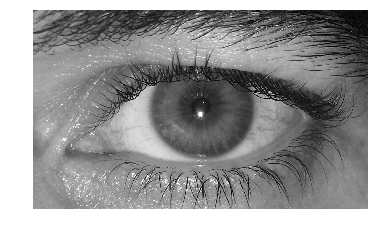

(766, 1292, 3)


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

def rgb2gray(rgb):
      return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# read and decode the image
image_contents = tf.read_file('iris2.png')
image = tf.image.decode_jpeg(image_contents, channels=3)


with tf.Session() as sess:  
    rgb_img = sess.run(image)
    (height,width,pixel_no)=rgb_img.shape
    gray_image=tf.image.rgb_to_grayscale(rgb_img)#we can also use our rgb2gray(rgb) function for making gray image
    gray_img=(sess.run(gray_image))
    gray_img=gray_img.reshape((height,width))
    plt.axis('off')
    plt.imshow(gray_img,cmap='gray')
    plt.show()
    print(rgb_img.shape)

(766, 1292) (766, 1292)


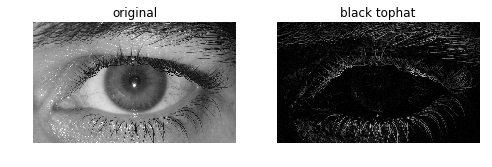

In [16]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    
selem = disk(6)
b_tophat = black_tophat(gray_img, selem)
plot_comparison(gray_img, b_tophat, 'black tophat')
print(gray_img.shape, b_tophat.shape)

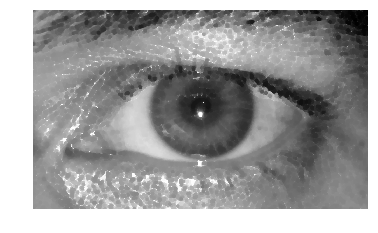

(766, 1292)


In [17]:
resultant_img=b_tophat+gray_img
plt.axis('off')
plt.imshow(resultant_img,cmap='gray')
plt.show()
print(resultant_img.shape)

(280, 472, 1)


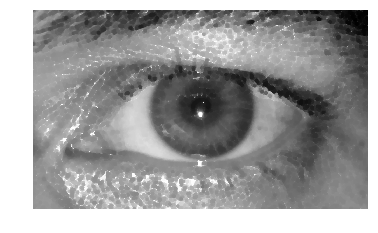

In [18]:
with tf.Session() as sess:
    new_height=280
    new_width=(width/height)*new_height
    resize_img=tf.image.resize_images(resultant_img.reshape(height,width,1),
        [int(new_height),int(new_width)],method=tf.image.ResizeMethod.BILINEAR,
            align_corners=False)
    resize_img = sess.run(resize_img)
    print(resize_img.shape)
    plt.axis('off')
    plt.imshow(resultant_img,cmap='gray')
    plt.show()

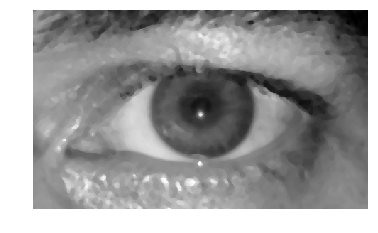

(280, 472)


In [19]:
import cv2
median_img = cv2.medianBlur(resize_img,7)
plt.axis('off')
plt.imshow(median_img,cmap='gray')
plt.show()
print(median_img.shape)

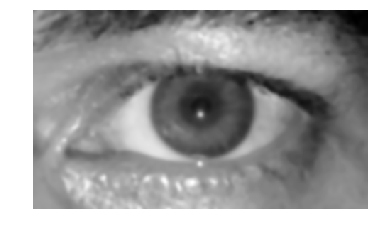

In [20]:
import scipy
gaussian_img=scipy.ndimage.filters.gaussian_filter(median_img, sigma=1.90, order=0,
                                                   output=None, 
                                                   mode='reflect', 
                                                   cval=0.0, truncate=4.0)
plt.axis('off')
plt.imshow(gaussian_img,cmap='gray')
plt.show()
row,column=gaussian_img.shape

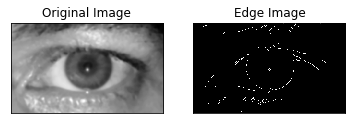

In [21]:
gaussian_img=gaussian_img.astype(int)#float to int conversation
gaussian_img = np.uint8(gaussian_img)#int to unit8 conversationcv2

edges = cv2.Canny(gaussian_img,80,80)#we can change the last two parameter to 
plt.subplot(121),plt.imshow(gaussian_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()